# Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Dataset Characteristics:
### Number of instances:
20640
### Number of Attributes
8 numeric, predictive attributes and the target
### Attribute information
* Medinc - median income in block
* HouseAge - median house age in block
* AveRooms - avg number of rooms
* AveBedrms - avg number of bedrooms
* population - block population
* AveOccup - avg house occupancy
* Lattitude house block latitude
* Longitude - house block longitude

### Target
The target variable is the median house in units of 100,000 for California district
### Documentation

In [3]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
print(housing.target_names)

['MedHouseVal']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(housing.data,housing.target,random_state=2)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

# Standardization of data

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# to get same random state everytime 

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
print(X_train.shape,X_valid.shape,X_test.shape,y_train.shape,y_valid.shape,y_test.shape)

(11610, 8) (3870, 8) (5160, 8) (11610,) (3870,) (5160,)


In [9]:
X_train[23]

array([-1.01613391,  0.42150254, -0.68154227, -0.36011062, -0.76773465,
        0.18549705, -0.78769199,  0.75645598])

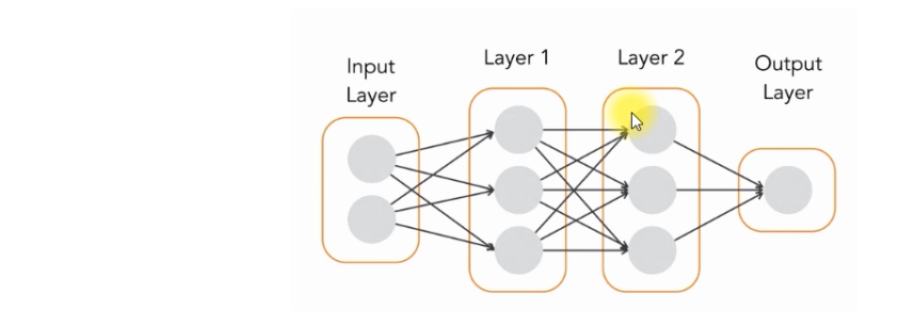

# model crearion,compilation and fit

In [10]:
model = keras.models.Sequential([keras.layers.Dense(30,activation="relu",input_shape=[8]),
                                 keras.layers.Dense(30,activation="relu"),
                                 keras.layers.Dense(1)])
# keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

In [13]:
model_history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 3.2668 - mae: 1.4157 - val_loss: 2.1501 - val_mae: 0.6697
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0114 - mae: 0.6328 - val_loss: 0.9292 - val_mae: 0.5821
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6239 - mae: 0.5692 - val_loss: 0.6277 - val_mae: 0.5554
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6002 - mae: 0.5573 - val_loss: 0.5258 - val_mae: 0.5285
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5307 - mae: 0.5252 - val_loss: 0.5023 - val_mae: 0.5157
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5429 - mae: 0.5236 - val_loss: 0.4848 - val_mae: 0.5060
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5092 - mae: 0.5125 - val_loss: 0.4814 - val_mae: 0.5031
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.

In [14]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4307 - mae: 0.4693


In [15]:
model_history.history

{'loss': [1.8240371942520142,
  0.7858894467353821,
  0.6435364484786987,
  0.5781315565109253,
  0.5495566129684448,
  0.5289595723152161,
  0.5125510692596436,
  0.49806928634643555,
  0.4873296320438385,
  0.47704437375068665,
  0.47097358107566833,
  0.4627538025379181,
  0.45702555775642395,
  0.45066362619400024,
  0.4475525915622711,
  0.441285640001297,
  0.4386466443538666,
  0.43337300419807434,
  0.4299774765968323,
  0.42679905891418457],
 'mae': [0.9914568662643433,
  0.6095166802406311,
  0.5726520419120789,
  0.5484825968742371,
  0.5335069298744202,
  0.52276211977005,
  0.5129099488258362,
  0.5049814581871033,
  0.5001632571220398,
  0.49315744638442993,
  0.49049484729766846,
  0.48586446046829224,
  0.4828299880027771,
  0.4796246290206909,
  0.4779098331928253,
  0.47478026151657104,
  0.47244542837142944,
  0.4707532525062561,
  0.4673904776573181,
  0.4669056236743927],
 'val_loss': [2.1501262187957764,
  0.9291973114013672,
  0.6277060508728027,
  0.525818586349

In [16]:
model_history.params

{'verbose': 1, 'epochs': 20, 'steps': 363}

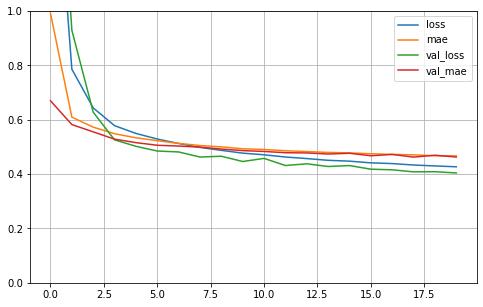

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
X_new = X_test[:3]

In [19]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[2.868542 ]
 [1.3473688]
 [1.121655 ]]
[2.787 2.076 0.967]


# Functional API 

In [20]:
# del model
keras.backend.clear_session()

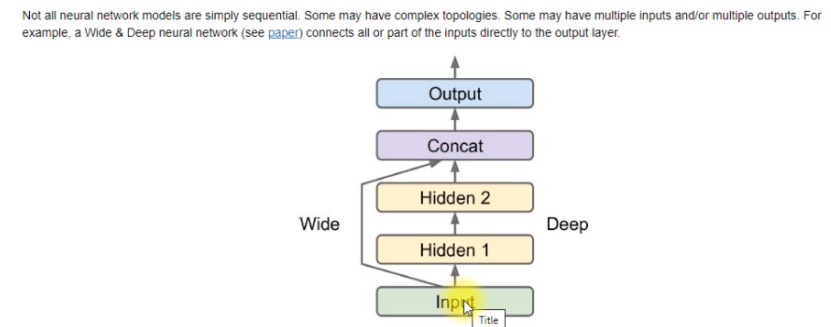

In [21]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model_1 = keras.models.Model(inputs=[input_],outputs=[output])

In [22]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [23]:
model_1.compile(loss="mean_squared_error",optimizer=keras.optimizers.SGD(lr=1e-3),metrics=["mae"])

In [24]:
model_1_history = model_1.fit(X_train,y_train,epochs=40,validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 2s 5ms/step - loss: 2.9250 - mae: 1.2737 - val_loss: 0.7091 - val_mae: 0.5950
Epoch 2/40
363/363 [==============================] - 1s 4ms/step - loss: 0.7151 - mae: 0.6096 - val_loss: 0.6593 - val_mae: 0.5799
Epoch 3/40
363/363 [==============================] - 1s 4ms/step - loss: 0.6473 - mae: 0.5876 - val_loss: 0.5868 - val_mae: 0.5618
Epoch 4/40
363/363 [==============================] - 1s 4ms/step - loss: 0.6421 - mae: 0.5786 - val_loss: 0.5592 - val_mae: 0.5491
Epoch 5/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5705 - mae: 0.5471 - val_loss: 0.5419 - val_mae: 0.5355
Epoch 6/40
363/363 [==============================] - 1s 4ms/step - loss: 0.5829 - mae: 0.5457 - val_loss: 0.5164 - val_mae: 0.5267
Epoch 7/40
363/363 [==============================] - 2s 5ms/step - loss: 0.5462 - mae: 0.5342 - val_loss: 0.5063 - val_mae: 0.5220
Epoch 8/40
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [25]:
mae_test = model_1.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3993 - mae: 0.4507


In [26]:
model_1_history.history

{'loss': [1.7337183952331543,
  0.7064651846885681,
  0.6583647131919861,
  0.6170673966407776,
  0.5873732566833496,
  0.5664969086647034,
  0.5468112826347351,
  0.5311693549156189,
  0.5184117555618286,
  0.506951093673706,
  0.49791306257247925,
  0.4888658821582794,
  0.482159823179245,
  0.4746941924095154,
  0.46852847933769226,
  0.4633268117904663,
  0.45907101035118103,
  0.4526650309562683,
  0.4492163062095642,
  0.444680392742157,
  0.4406542181968689,
  0.43700867891311646,
  0.43297791481018066,
  0.42978790402412415,
  0.4260843098163605,
  0.422494113445282,
  0.41982460021972656,
  0.41582679748535156,
  0.41439738869667053,
  0.41084378957748413,
  0.40833109617233276,
  0.4053157866001129,
  0.4031311273574829,
  0.40046465396881104,
  0.3982700705528259,
  0.396092027425766,
  0.39376965165138245,
  0.3916546404361725,
  0.3900480568408966,
  0.3882395327091217],
 'mae': [0.927453339099884,
  0.6064539551734924,
  0.5884809494018555,
  0.5691820383071899,
  0.55467

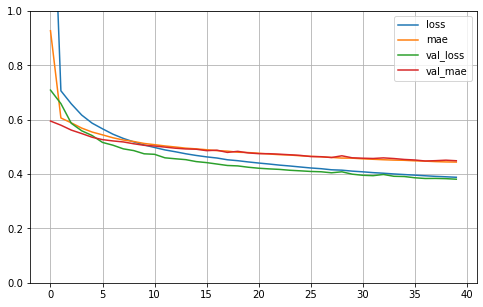

In [27]:
pd.DataFrame(model_1_history.history).plot(figsize=[8,5])
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Saving and Restoring 

In [28]:
model_1.save("my_functionAPI_model.h5")

In [29]:
%pwd

'/home/sahil/Documents/datascience_starttech/8 Regression model using keras nad tensorflow'

In [30]:
del model_1
keras.backend.clear_session()

In [31]:
model = keras.models.load_model("my_functionAPI_model.h5")

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [33]:
y_pred = model.predict(X_new)
print(y_pred)

[[2.8977706 ]
 [1.2596588 ]
 [0.99081635]]


# Using Callback during Training

In [34]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [36]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [37]:
chekpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [38]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[chekpoint_cb])

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 3.2668 - val_loss: 2.1501
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 1.0114 - val_loss: 0.9292
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6239 - val_loss: 0.6277
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6002 - val_loss: 0.5258
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5307 - val_loss: 0.5023
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5429 - val_loss: 0.4848
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5092 - val_loss: 0.4814
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4880 - val_loss: 0.4626
Epoch 9/10
363/363 [==============================] - 2s 4ms/step - loss: 0.4982 - val_loss: 0.4656
Epoch 10/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4910 - val_loss: 0.4463

In [39]:
del model
keras.backend.clear_session()
model = keras.models.load_model("Model-10.h5")
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4779


# Best model Only

In [40]:
del model
keras.backend.clear_session()

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mse",optimizer = keras.optimizers.SGD(lr=1e-3))

In [44]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5",save_best_only=True)

In [45]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 2.3442 - val_loss: 0.7905
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7797 - val_loss: 0.6846
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6805 - val_loss: 0.6192
Epoch 4/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6463 - val_loss: 0.5688
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5717 - val_loss: 0.5425
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5794 - val_loss: 0.5181
Epoch 7/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5331 - val_loss: 0.4931
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5046 - val_loss: 0.4781
Epoch 9/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5063 - val_loss: 0.4627
Epoch 10/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4915 - val_loss: 0.4548

In [46]:
model = keras.models.load_model("Best_Model.h5")#roll back best model
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4790


# Best model by early stop method

In [47]:
del model
keras.backend.clear_session()

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [59]:
model.compile(loss="mse",optimizer = keras.optimizers.SGD(lr=1e-3),metrics="mae")

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [66]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
# patience: Number of epochs with no improvement after which training will be stopped

In [62]:
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 2s 5ms/step - loss: 0.4290 - mae: 0.4685 - val_loss: 0.4120 - val_mae: 0.4618
Epoch 2/200
363/363 [==============================] - 2s 6ms/step - loss: 0.4184 - mae: 0.4642 - val_loss: 0.4066 - val_mae: 0.4652
Epoch 3/200
363/363 [==============================] - 2s 4ms/step - loss: 0.4074 - mae: 0.4582 - val_loss: 0.4036 - val_mae: 0.4655
Epoch 4/200
363/363 [==============================] - 2s 5ms/step - loss: 0.4198 - mae: 0.4613 - val_loss: 0.4172 - val_mae: 0.4645
Epoch 5/200
363/363 [==============================] - 2s 4ms/step - loss: 0.3935 - mae: 0.4502 - val_loss: 0.4136 - val_mae: 0.4597
Epoch 6/200
363/363 [==============================] - 1s 4ms/step - loss: 0.4183 - mae: 0.4570 - val_loss: 0.4139 - val_mae: 0.4567
Epoch 7/200
363/363 [==============================] - 2s 4ms/step - loss: 0.4003 - mae: 0.4527 - val_loss: 0.3966 - val_mae: 0.4553
Epoch 8/200
363/363 [==============================] - 2s 5ms/step - 

363/363 [==============================] - 2s 4ms/step - loss: 0.3511 - mae: 0.4228 - val_loss: 0.3444 - val_mae: 0.4231
Epoch 63/200
363/363 [==============================] - 2s 5ms/step - loss: 0.3434 - mae: 0.4176 - val_loss: 0.3429 - val_mae: 0.4187
Epoch 64/200
363/363 [==============================] - 1s 4ms/step - loss: 0.3484 - mae: 0.4176 - val_loss: 0.3438 - val_mae: 0.4220
Epoch 65/200
363/363 [==============================] - 1s 4ms/step - loss: 0.3268 - mae: 0.4110 - val_loss: 0.3426 - val_mae: 0.4204
Epoch 66/200
363/363 [==============================] - 2s 4ms/step - loss: 0.3291 - mae: 0.4092 - val_loss: 0.3412 - val_mae: 0.4188
Epoch 67/200
363/363 [==============================] - 2s 4ms/step - loss: 0.3492 - mae: 0.4168 - val_loss: 0.3412 - val_mae: 0.4192
Epoch 68/200
363/363 [==============================] - 1s 4ms/step - loss: 0.3318 - mae: 0.4104 - val_loss: 0.3414 - val_mae: 0.4206
Epoch 69/200
363/363 [==============================] - 1s 4ms/step - loss:

363/363 [==============================] - 1s 4ms/step - loss: 0.3180 - mae: 0.3999 - val_loss: 0.3234 - val_mae: 0.4077
Epoch 124/200
363/363 [==============================] - 1s 4ms/step - loss: 0.3151 - mae: 0.3952 - val_loss: 0.3233 - val_mae: 0.4080
Epoch 125/200
363/363 [==============================] - 1s 4ms/step - loss: 0.3227 - mae: 0.4037 - val_loss: 0.3271 - val_mae: 0.4113
Epoch 126/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3330 - mae: 0.4069 - val_loss: 0.3215 - val_mae: 0.4048
Epoch 127/200
363/363 [==============================] - 2s 5ms/step - loss: 0.3089 - mae: 0.3934 - val_loss: 0.3222 - val_mae: 0.4070
Epoch 128/200
363/363 [==============================] - 1s 4ms/step - loss: 0.3291 - mae: 0.4042 - val_loss: 0.3205 - val_mae: 0.4030
Epoch 129/200
363/363 [==============================] - 2s 5ms/step - loss: 0.3209 - mae: 0.4027 - val_loss: 0.3239 - val_mae: 0.4057
Epoch 130/200
363/363 [==============================] - 1s 4ms/step 

In [63]:
model= keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 1s 2ms/step - loss: 0.3361 - mae: 0.4081


In [64]:
history.history

{'loss': [0.41997066140174866,
  0.4186328649520874,
  0.4146072268486023,
  0.4127814471721649,
  0.40972524881362915,
  0.4094659984111786,
  0.4052411913871765,
  0.40340232849121094,
  0.40093550086021423,
  0.39896199107170105,
  0.3961980938911438,
  0.3945246934890747,
  0.3921574354171753,
  0.3905385732650757,
  0.38843461871147156,
  0.3866659700870514,
  0.38514459133148193,
  0.38328123092651367,
  0.381813645362854,
  0.3805330693721771,
  0.3788292109966278,
  0.37741702795028687,
  0.3761487305164337,
  0.3746422529220581,
  0.3735433518886566,
  0.3723566234111786,
  0.3716585636138916,
  0.3710232973098755,
  0.37185007333755493,
  0.3733939230442047,
  0.3840721547603607,
  0.3950982093811035,
  0.40994471311569214,
  0.36771515011787415,
  0.3635048568248749,
  0.36240699887275696,
  0.3611741065979004,
  0.3604910969734192,
  0.3595881760120392,
  0.3586690425872803,
  0.35764020681381226,
  0.35678818821907043,
  0.3560241162776947,
  0.35533812642097473,
  0.35435

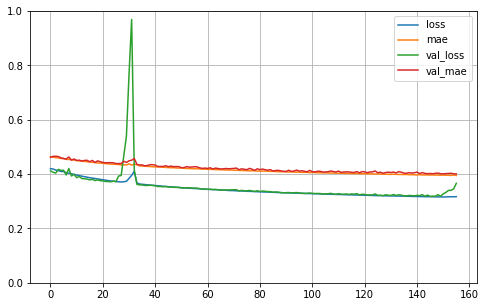

In [65]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()